In [1]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
# Datasets
datasets = {
    'iris': load_iris(),
    'breast_cancer': load_breast_cancer(),
    'digits': load_digits()
}

# Kernel functions to evaluate
kernels = ['rbf', 'poly', 'linear', 'sigmoid']

In [3]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [4]:
results = {}
for name, data in datasets.items():
    results[name] = {}
    for kernel in kernels:
        classifier = SVC(kernel=kernel, degree=3 if kernel == 'poly' else 3)
        # Compute cross-validated accuracy score
        cv_scores = cross_val_score(classifier, data.data, data.target, cv=k_fold, scoring='accuracy')
        results[name][kernel] = np.mean(cv_scores), np.std(cv_scores)

In [5]:
for dataset in results:
    print(f"Results for {dataset}:")
    for kernel, stats in results[dataset].items():
        mean_accuracy, std_dev = stats
        print(f"  Kernel: {kernel}, Mean Accuracy: {mean_accuracy:.2f}, Std Dev: {std_dev:.2f}")

Results for iris:
  Kernel: rbf, Mean Accuracy: 0.97, Std Dev: 0.04
  Kernel: poly, Mean Accuracy: 0.96, Std Dev: 0.05
  Kernel: linear, Mean Accuracy: 0.97, Std Dev: 0.04
  Kernel: sigmoid, Mean Accuracy: 0.19, Std Dev: 0.06
Results for breast_cancer:
  Kernel: rbf, Mean Accuracy: 0.92, Std Dev: 0.04
  Kernel: poly, Mean Accuracy: 0.91, Std Dev: 0.05
  Kernel: linear, Mean Accuracy: 0.96, Std Dev: 0.03
  Kernel: sigmoid, Mean Accuracy: 0.43, Std Dev: 0.04
Results for digits:
  Kernel: rbf, Mean Accuracy: 0.99, Std Dev: 0.01
  Kernel: poly, Mean Accuracy: 0.99, Std Dev: 0.01
  Kernel: linear, Mean Accuracy: 0.98, Std Dev: 0.01
  Kernel: sigmoid, Mean Accuracy: 0.90, Std Dev: 0.02


In [7]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
features = data.data  # Features
labels = data.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(features)

<Axes: >

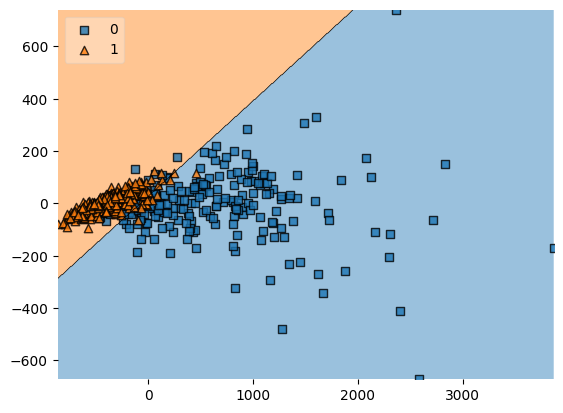

In [10]:
from mlxtend.plotting import plot_decision_regions
svm = SVC(C=0.5, kernel='linear')
svm.fit(features, labels)
plot_decision_regions(features, labels, clf=svm, legend=2)

<Axes: >

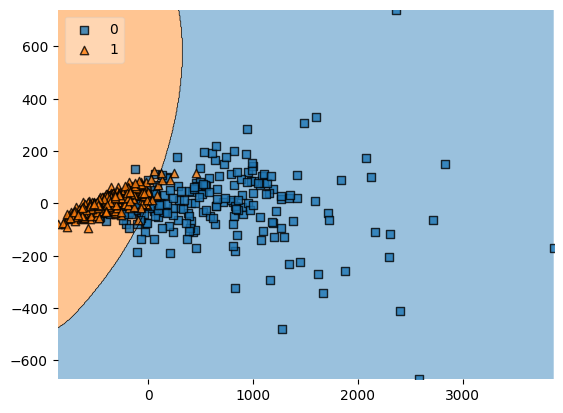

In [11]:
from mlxtend.plotting import plot_decision_regions
svm = SVC(C=0.5, kernel='rbf')
svm.fit(features, labels)
plot_decision_regions(features, labels, clf=svm, legend=2)

<Axes: >

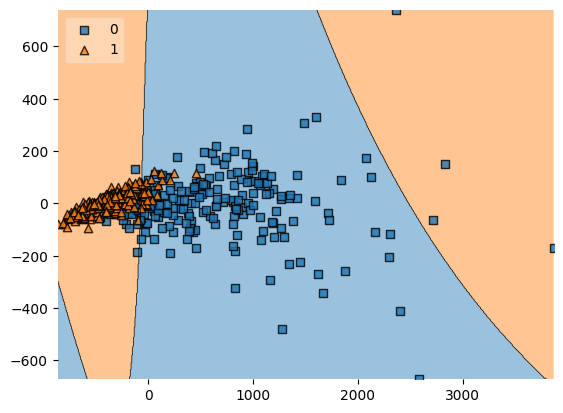

In [12]:
from mlxtend.plotting import plot_decision_regions
svm = SVC(C=0.5, kernel='sigmoid')
svm.fit(features, labels)
plot_decision_regions(features, labels, clf=svm, legend=2)

<Axes: >

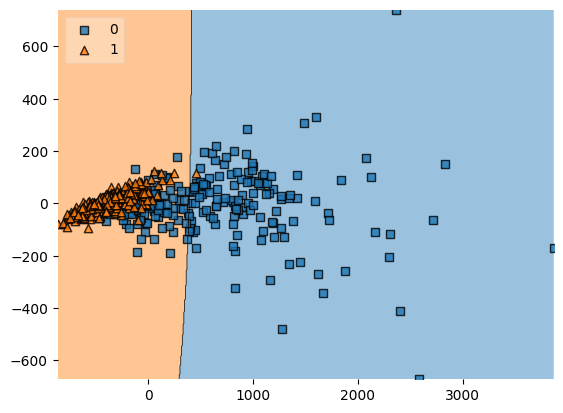

In [13]:
from mlxtend.plotting import plot_decision_regions
svm = SVC(C=0.5, kernel='poly')
svm.fit(features, labels)
plot_decision_regions(features, labels, clf=svm, legend=2)